In [1]:
!pip install torch-geometric
!pip install torch==2.6.0+cu118 torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install torch-scatter -f https://data.pyg.org/whl/torch-2.6.0+cu118.html
!pip install matplotlib

Looking in indexes: https://download.pytorch.org/whl/cu118
Looking in links: https://data.pyg.org/whl/torch-2.6.0+cu118.html


In [2]:
from class_gnn import TorsoGCNv1, TorsoGCNv2, TorsoGCNv3

In [3]:
import torch 

from class_gnn import TorsoGCNv1, TorsoGCNv2, TorsoGCNv3
from utils_graph import visualize_graph_2d, tensor_batch_to_graphs, tensor_to_graph_hybrid, visualize_hybrid_graph, graph_to_line_graph_fast




In [14]:


xx_batch = torch.tensor([[[[[ 1.,  0.,  0.,  0.],
                      [ 0.,  1.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.]],

                    [ [ 0.,  0.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.],
                      [ 1.,  0.,  0.,  0.],
                      [ 0.,  1.,  0.,  0.]],

                    [ [ 0.,  0.,  1.,  0.],
                      [ 0.,  0.,  0.,  1.],
                      [ 0.,  0.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.]],

                    [ [ 0.,  0.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.],
                      [ 0.,  0.,  1.,  0.],
                      [ 0.,  0.,  0.,  1.]]],


                   [[[ 1.,  0.,  0.,  0.],
                      [ 0.,  1.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.]],

                    [ [ 0.,  0.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.],
                      [ 1.,  0.,  0.,  0.],
                      [ 0.,  1.,  0.,  0.]],

                    [ [ 0.,  0.,  1.,  0.],
                      [ 0.,  0.,  0.,  1.],
                      [ 0.,  0.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.]],

                    [ [ 0.,  0.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.],
                      [ 0.,  0.,  1.,  0.],
                      [ 0.,  0.,  0.,  1.]]]]], device='cuda') # Batch di 2 tensori su CUDA


xx_batch = torch.tensor([[[[[ 1.,  0.,  0.,  0.],
                      [ 0.,  1.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.]],

                    [ [ 0.,  0.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.],
                      [ 1.,  0.,  0.,  0.],
                      [ 0.,  1.,  0.,  0.]],

                    [ [ 0.,  0.,  1.,  0.],
                      [ 0.,  0.,  0.,  1.],
                      [ 0.,  0.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.]],

                    [ [ 0.,  0.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.],
                      [ 0.,  0.,  1.,  0.],
                      [ 0.,  0.,  0.,  1.]]],


                   [[[ 1.,  0.,  0.,  0.],
                      [ 0.,  1.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.]],

                    [ [ 0.,  0.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.],
                      [ 1.,  0.,  0.,  0.],
                      [ 0.,  1.,  0.,  0.]],

                    [ [ 0.,  0.,  1.,  0.],
                      [ 0.,  0.,  0.,  1.],
                      [ 0.,  0.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.]],

                    [ [ 0.,  0.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.],
                      [ 0.,  0.,  1.,  0.],
                      [ 0.,  0.,  0.,  1.]]]]], device='cuda') # Batch di 2 tensori su CUDA


xx_batch = torch.tensor([[[[[1., 0.],
                             [1., 0.]],

                            [[1., 0.],
                             [0., 1.]]]]], device='cuda')  # Batch di 1 tensore su CUDA




In [5]:
xx_batch = torch.tensor([[[[[ 1.,  0.,  0.,  0.],
                      [ 0.,  1.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.]],

                    [ [ 0.,  0.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.],
                      [ 1.,  0.,  0.,  0.],
                      [ 0.,  1.,  0.,  0.]],

                    [ [ 0.,  0.,  1.,  0.],
                      [ 0.,  0.,  0.,  1.],
                      [ 0.,  0.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.]],

                    [ [ 0.,  0.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.],
                      [ 0.,  0.,  1.,  0.],
                      [ 0.,  0.,  0.,  1.]]],


                   [[[ 1.,  0.,  0.,  0.],
                      [ 0.,  1.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.]],

                    [ [ 0.,  0.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.],
                      [ 1.,  0.,  0.,  0.],
                      [ 0.,  1.,  0.,  0.]],

                    [ [ 0.,  0.,  1.,  0.],
                      [ 0.,  0.,  0.,  1.],
                      [ 0.,  0.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.]],

                    [ [ 0.,  0.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.],
                      [ 0.,  0.,  1.,  0.],
                      [ 0.,  0.,  0.,  1.]]]],
                     
                     
                     
                     [[[[ 1.,  0.,  0.,  0.],
                      [ 0.,  1.,  0.,  0.],
                      [ 1.,  0.,  0.,  2.],
                      [ 0.,  0.,  0.,  0.]],

                    [ [ 0.,  2.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.],
                      [ 1.,  0.,  2.,  0.],
                      [ 0.,  2.,  0.,  0.]],

                    [ [ 0.,  0.,  1.,  0.],
                      [ 0.,  0.,  0.,  1.],
                      [ 0.,  3.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.]],

                    [ [ 0.,  0.,  0.,  1.],
                      [ 0.,  0.,  0.,  0.],
                      [ 0.,  -1.,  -1.,  0.],
                      [ 0.,  0.,  0.,  1.]]],


                   [[[ 0.,  0.,  0.,  0.],
                     [ 0.,  0.,  0.,  0.],
                     [ 0.,  1.,  0.,  0.],
                     [ 0.,  0.,  0.,  1.]],

                    [[ 1.,  0.,  0.,  0.],
                     [ 0.,  0.,  1.,  0.],
                     [ 0.,  0.,  0.,  0.],
                     [ 0.,  1.,  0.,  0.]],

                    [[ 0.,  0.,  0.,  0.],
                     [ 0.,  0.,  0.,  0.],
                     [ 0.,  0.,  3.,  0.],
                     [ 0.,  0.,  0.,  0.]],

                    [[ 0.,  0.,  0.,  0.],
                     [ 0.,  2.,  0.,  0.],
                     [ 0.,  0.,  0.,  0.],
                     [ 0.,  0.,  0.,  1.]]]]], device='cuda') # 2 Batch di 2 tensori su CUDA

print(xx_batch.shape)  # Verifica la forma del tensore


torch.Size([2, 2, 4, 4, 4])


In [6]:
xx_batch = torch.tensor([[[[[ 1.,  0.,  0.,  0.],
                      [ 0.,  1.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.]],

                    [ [ 0.,  0.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.],
                      [ 1.,  0.,  0.,  0.],
                      [ 0.,  1.,  0.,  0.]],

                    [ [ 0.,  0.,  1.,  0.],
                      [ 0.,  0.,  0.,  1.],
                      [ 0.,  0.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.]],

                    [ [ 0.,  0.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.],
                      [ 0.,  0.,  1.,  0.],
                      [ 0.,  0.,  0.,  1.]]],


                   [[[ 1.,  0.,  0.,  0.],
                      [ 0.,  1.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.]],

                    [ [ 0.,  0.,  0.,  0.],
                      [ 0.,  1.,  1.,  0.],
                      [ 1.,  0.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.]],

                    [ [ 0.,  0.,  1.,  0.],
                      [ 0.,  0.,  0.,  1.],
                      [ 0.,  0.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.]],

                    [ [ 1.,  0.,  0.,  0.],
                      [ 0.,  0.,  0.,  -1.],
                      [ 0.,  0.,  0.,  0.],
                      [ -1.,  0.,  0.,  1.]]]]], device='cuda') # 1 Batch di 2 tensori su CUDA

print(xx_batch.shape)  # Verifica la forma del tensore

torch.Size([1, 2, 4, 4, 4])


In [7]:
xx_batch = torch.tensor([[[[[1., 0.],
                             [0., 1.]],

                            [[0., 0.],
                             [1., 0.]]],

                           [[[1., 0.],
                             [0., 1.]],

                            [[1., 0.],
                             [0., 1.]]]]], device='cuda')  # Batch di 1 tensore su CUDA

print(xx_batch.shape)  # Verifica la forma del tensore

torch.Size([1, 2, 2, 2, 2])


In [8]:
xx_batch = torch.tensor([[[[[ 1.,  0.,  0.,  0.],
                      [ 0.,  1.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.]],

                    [ [ 0.,  0.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.],
                      [ 1.,  0.,  0.,  0.],
                      [ 0.,  1.,  0.,  0.]],

                    [ [ 0.,  0.,  1.,  0.],
                      [ 0.,  0.,  0.,  1.],
                      [ 0.,  0.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.]],

                    [ [ 0.,  0.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.],
                      [ 0.,  0.,  1.,  0.],
                      [ 0.,  0.,  0.,  1.]]]]]) #batch di 1 tensore 

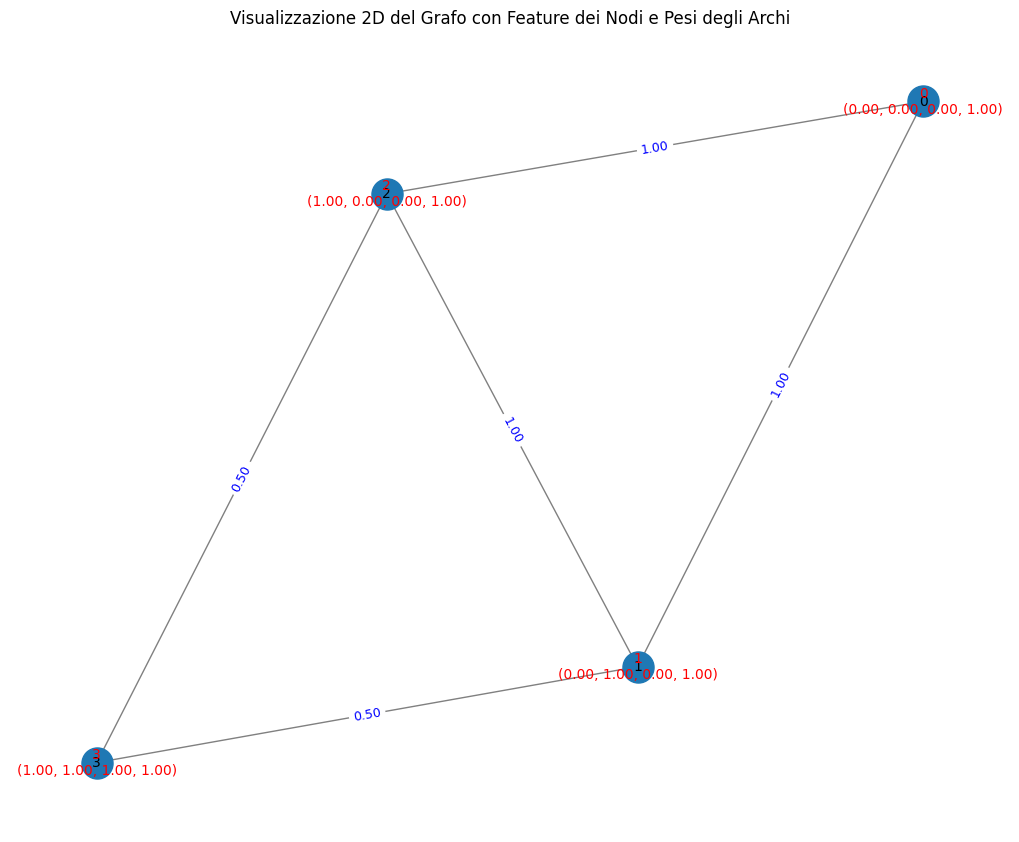

In [15]:
graph_batch = tensor_batch_to_graphs(xx_batch, False)
visualize_graph_2d(graph_batch)

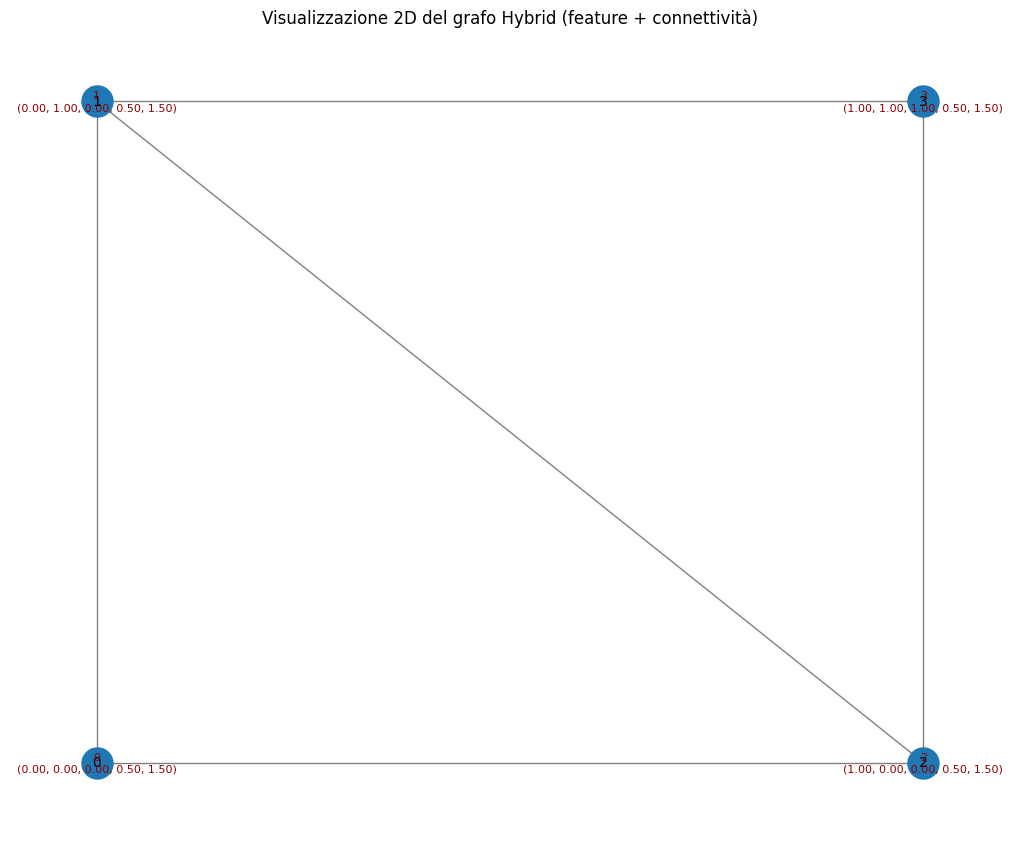

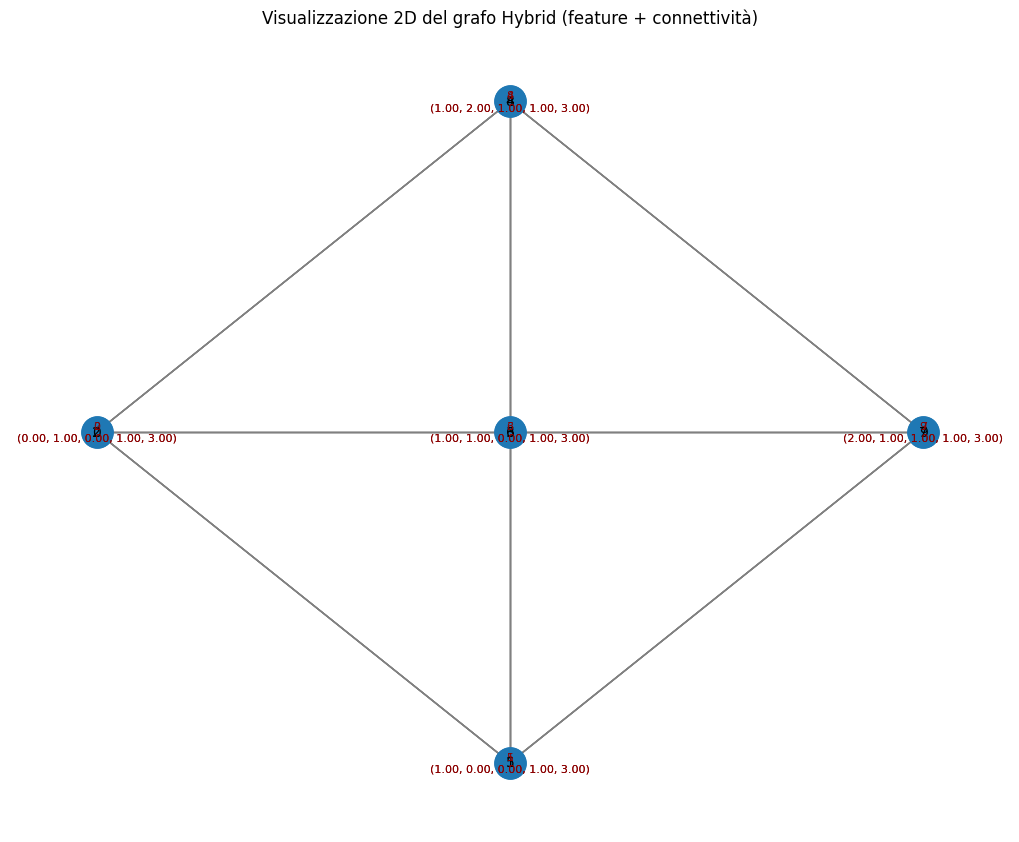

In [16]:
B, dev = xx_batch.size(0), xx_batch.device
# --- GNN on current frame -------------------------------
graphs = [
    tensor_to_graph_hybrid(xx_batch[b,0], 3.0)
    for b in range(B)
]
visualize_hybrid_graph(graphs[0])
graphs = [graph_to_line_graph_fast(g) for g in graphs]
visualize_hybrid_graph(graphs[0])


In [11]:
graph_batch = tensor_batch_to_graphs(xx_batch, False)
print(type(graph_batch))  # Controlla il tipo dell'oggetto restituito
print(graph_batch)  # Stampa l'oggetto per vedere cosa contiene
print(graph_batch.num_graphs)  # Numero di grafi nel batch
print(graph_batch.x.shape if hasattr(graph_batch, "x") else "No x attribute")
print(graph_batch.edge_index.shape if hasattr(graph_batch, "edge_index") else "No edge_index attribute")


<class 'abc.DataBatch'>
DataBatch(x=[8, 4], edge_index=[2, 24], edge_attr=[24, 1], batch=[8], ptr=[2])
1
torch.Size([8, 4])
torch.Size([2, 24])


In [12]:
print(f"edge_attr: {graph_batch.edge_attr.shape if hasattr(graph_batch, 'edge_attr') else 'None'}")
print(graph_batch.edge_attr)

edge_attr: torch.Size([24, 1])
tensor([[0.5000],
        [1.0000],
        [0.5000],
        [0.5000],
        [1.0000],
        [0.5000],
        [1.0000],
        [0.5000],
        [0.5000],
        [1.0000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [1.0000],
        [0.5000],
        [0.5000],
        [1.0000],
        [0.5000],
        [1.0000],
        [0.5000],
        [0.5000],
        [1.0000],
        [0.5000]])


In [13]:
model = TorsoGCNv1(input_dim=5, hidden_dim=128, S=xx_batch.shape[-1], c=8).cuda()
embedding = model(xx_batch) #ATTENZIONE, QUI DEVI DARE IL TENSORE PERCHè NEL FORWARD CONVERTE GIà IN GRAFO
print(embedding.shape)  # Output atteso: torch.Size([batch_size, 48, 8]) -> se batch_size=2 torch.Size([2, 48, 8])

5 32 384


RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking argument for argument mat2 in method wrapper_CUDA_mm)

In [ ]:
model = TorsoGCNv2(input_dim=5, hidden_dim=128, S=xx_batch.shape[-1], c=8).cuda()
embedding = model(xx_batch) #ATTENZIONE, QUI DEVI DARE IL TENSORE PERCHè NEL FORWARD CONVERTE GIà IN GRAFO
print(embedding.shape)  # Output atteso: torch.Size([batch_size, 48, 8]) -> se batch_size=2 torch.Size([2, 48, 8])

In [ ]:
line_graph = tensor_batch_to_graphs(xx_batch, True)
visualize_graph_2d(line_graph)

In [ ]:
line_graph = tensor_batch_to_graphs(xx_batch, True)
visualize_graph_2d(line_graph)

In [ ]:
print(f"x: {graph_batch.x if graph_batch.x is not None else 'None'}")
print(f"edge_index: {graph_batch.edge_index.shape if graph_batch.edge_index is not None else 'None'}")

In [ ]:
print(f"edge_attr: {line_graph.edge_attr.shape if hasattr(line_graph, 'edge_attr') else 'None'}")
print(line_graph.edge_attr)


In [ ]:
model = TorsoGCNv3(input_dim=5, hidden_dim=128, S=xx_batch.shape[-1], c=8).cuda()
embedding = model(xx_batch) #ATTENZIONE, QUI DEVI DARE IL TENSORE PERCHè NEL FORWARD CONVERTE GIà IN GRAFO
print(embedding.shape)  # Output atteso: torch.Size([batch_size, 48, 8]) -> se batch_size=2 torch.Size([2, 48, 8])